In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.style.use('ggplot')
%matplotlib inline

In [2]:
def sn_draw(k):
    return np.random.normal(0,1,k)

def dm_chi_sq_draw(k):
    z = sn_draw(k)
    return z * z - np.ones(k)

In [3]:
def OLS(Y, X):
    Y = np.array(Y)
    X = np.c_[np.ones(np.shape(Y)),np.array(X)]
    
    cov = np.dot(np.transpose(X),Y)
    var = np.dot(np.transpose(X),X)
    
    return np.dot(np.linalg.inv(var), cov)

Mean of Beta: 0.999652759897
S.D. of Beta: 0.244033118215
Finite Sample:: 0.226327281773
Asymptotic 0.22360679775
*********

Mean of Beta: 0.999985415899
S.D. of Beta: 0.101762971658
Finite Sample:: 0.103482628193
Asymptotic 0.1
*********

Mean of Beta: 1.00007156267
S.D. of Beta: 0.0101274262655
Finite Sample:: 0.00999876221148
Asymptotic 0.01
*********



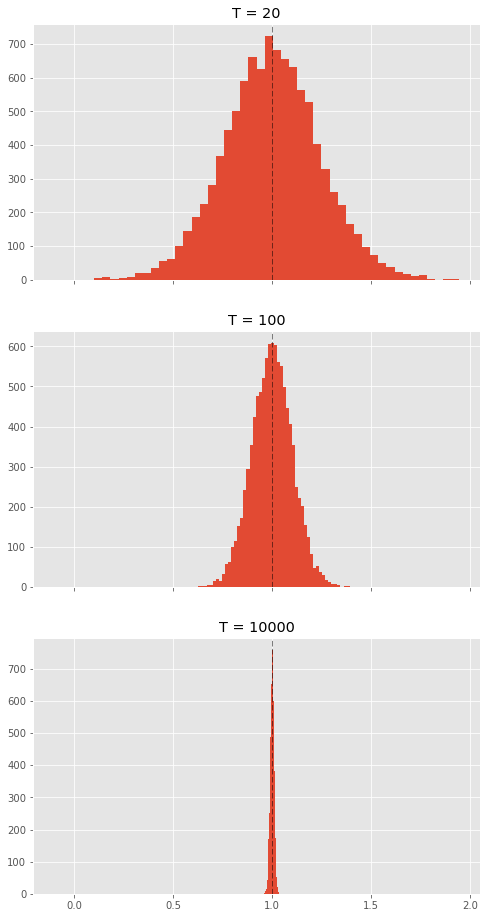

In [4]:
T = [20, 100, 10000]
fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,16))

for j, t in enumerate(T):
    
    betas = []
    
    for i in range(10000):
        x = sn_draw(t)
        e = sn_draw(t)
        y = x + e

        beta_hat = OLS(y, x)
        betas.append(beta_hat[1])
    
    print 'Mean of Beta:', np.mean(betas)
    print 'S.D. of Beta:', np.std(betas)
    
    print 'Finite Sample::', np.sqrt(1/np.sum(x*x))
    print 'Asymptotic', np.sqrt(1/t)
    
    print '*********\n'
    
    ax[j].hist(betas,bins=50)
    ax[j].set_title('T = ' +  str(t))
    ax[j].axvline(x=1, linewidth=0.5, color='k',linestyle='dashed')

Mean of Beta: 0.995724761911
S.D. of Beta: 0.299488894225
Finite Sample: 0.175730031852
Asymptotic: 0.22360679775
*********

Mean of Beta: 1.00080363128
S.D. of Beta: 0.107867527329
Finite Sample: 0.128934983192
Asymptotic: 0.1
*********

Mean of Beta: 0.999925437665
S.D. of Beta: 0.0100717919703
Finite Sample: 0.0103180836111
Asymptotic: 0.01
*********



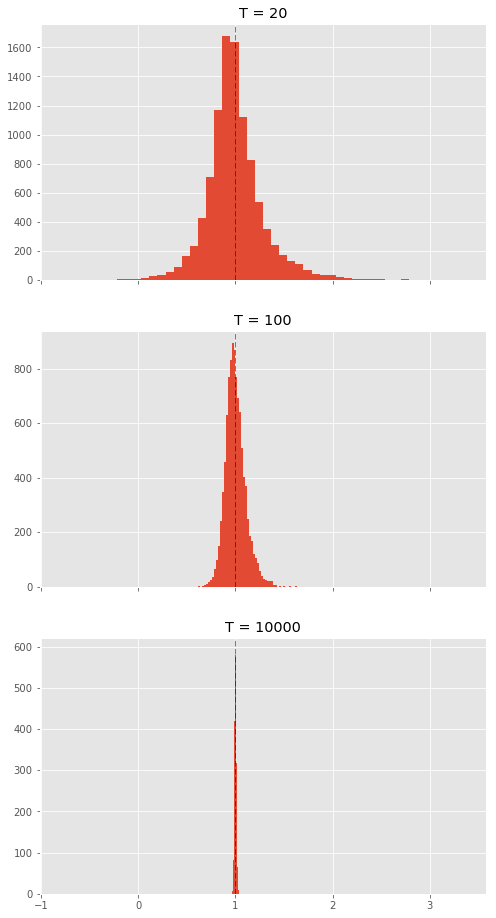

In [5]:
T = [20, 100, 10000]
fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,16))

for j, t in enumerate(T):
    
    betas = []
    
    for i in range(10000):
        x = dm_chi_sq_draw(t)
        e = dm_chi_sq_draw(t)
        y = x + e

        beta_hat = OLS(y, x)
        betas.append(beta_hat[1])        
    
    print 'Mean of Beta:', np.mean(betas)
    print 'S.D. of Beta:', np.std(betas)
    
    print 'Finite Sample:', np.sqrt(2/(np.sum(x*x)))
    print 'Asymptotic:', np.sqrt(1/t) #
    
    print '*********\n'
    
    ax[j].hist(betas,bins=50)
    ax[j].set_title('T = ' +  str(t))
    ax[j].axvline(x=1, linewidth=0.5, color='k',linestyle='dashed')

0.501811325032


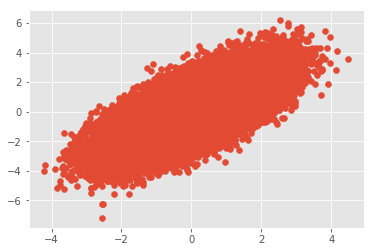

In [6]:
x = sn_draw(100000)
e = sn_draw(100000)
y = x + e

X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
print results.rsquared

plt.scatter(x, y)

0.502534389596


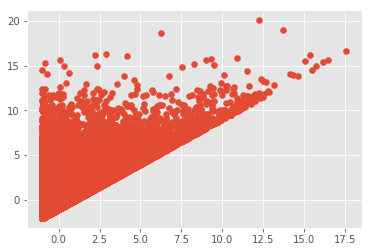

In [7]:
x = dm_chi_sq_draw(100000)
e = dm_chi_sq_draw(100000)
y = x + e

X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
print results.rsquared

plt.scatter(x, y)